<ipython-input-13-28ec123e4748>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(start="1924-01",periods=len(chicken),freq="M"))


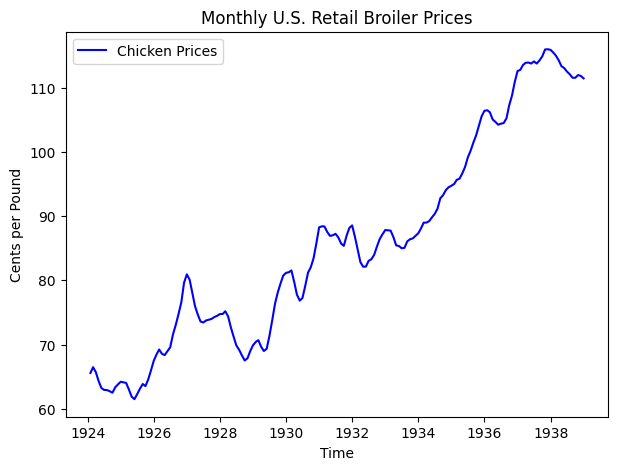

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from astsadata import chicken
chicken_series = pd.Series(chicken.values.flatten(),
              index=pd.date_range(start="1924-01",periods=len(chicken),freq="M"))
#original chicken price time series
plt.figure(figsize=(7,5))
plt.plot(chicken_series, label="Chicken Prices", color="blue")
plt.title("Monthly U.S. Retail Broiler Prices")
plt.xlabel("Time")
plt.ylabel("Cents per Pound")
plt.legend()
plt.show()

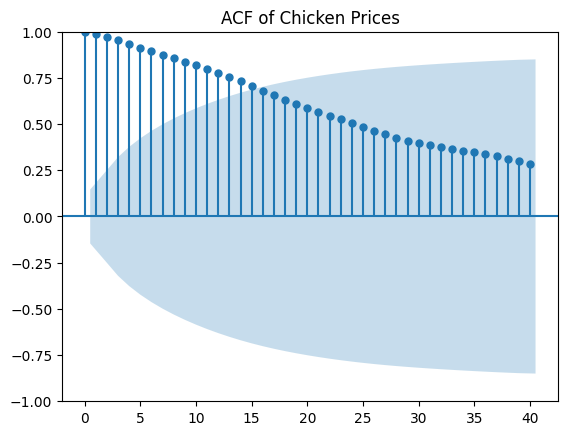

In [7]:
#ACF of the original series
sm.graphics.tsa.plot_acf(chicken_series, lags=40, title="ACF of Chicken Prices")
plt.show()

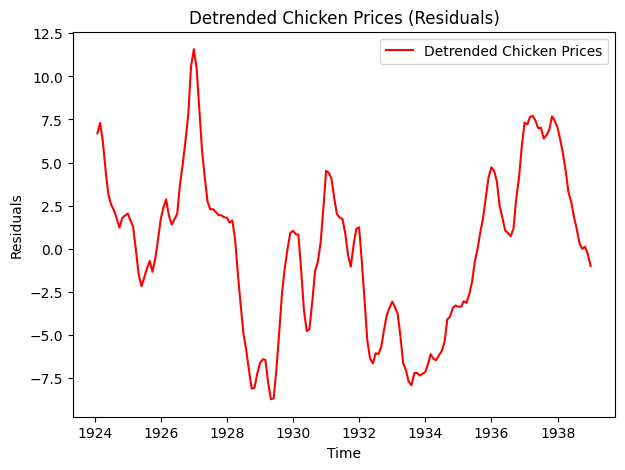

In [14]:
#Detrend using OLS
X = sm.add_constant(np.arange(len(chicken_series)))
model = sm.OLS(chicken_series, X).fit()
detrended_series = chicken_series - model.predict(X)

plt.figure(figsize=(7,5))
plt.plot(detrended_series, label="Detrended Chicken Prices", color="red")
plt.title("Detrended Chicken Prices (Residuals)")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.legend()
plt.show()

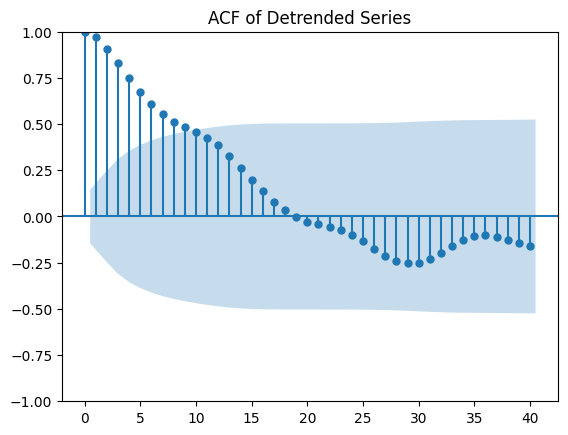

In [9]:
#ACF of the detrended series
sm.graphics.tsa.plot_acf(detrended_series, lags=40, title="ACF of Detrended Series")
plt.show()

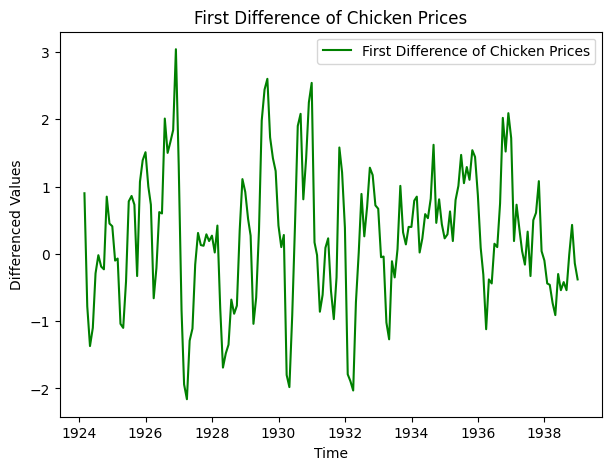

In [15]:
#first difference
diff_series = chicken_series.diff().dropna()

plt.figure(figsize=(7,5))
plt.plot(diff_series, label="First Difference of Chicken Prices", color="green")
plt.title("First Difference of Chicken Prices")
plt.xlabel("Time")
plt.ylabel("Differenced Values")
plt.legend()
plt.show()

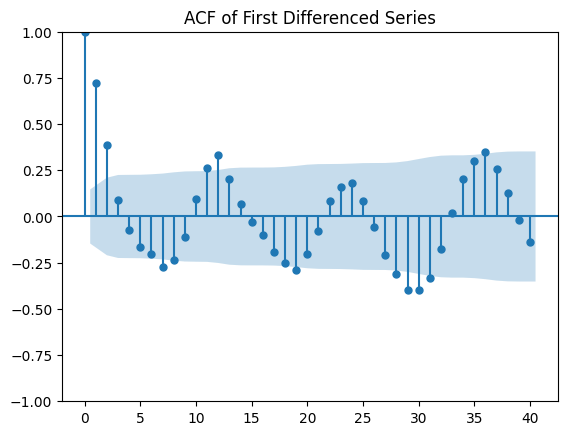

In [11]:
#ACF of first differenced series
sm.graphics.tsa.plot_acf(diff_series, lags=40, title="ACF of First Differenced Series")
plt.show()

In [12]:
#mean values for all series
mean_original = chicken_series.mean()
mean_detrended = detrended_series.mean()
mean_diff = diff_series.mean()
print(f"Mean of Original Series: {mean_original:.4f}")
print(f"Mean of Detrended Series: {mean_detrended:.4f}")
print(f"Mean of First Differenced Series: {mean_diff:.4f}")

Mean of Original Series: 85.6737
Mean of Detrended Series: -0.0000
Mean of First Differenced Series: 0.2563


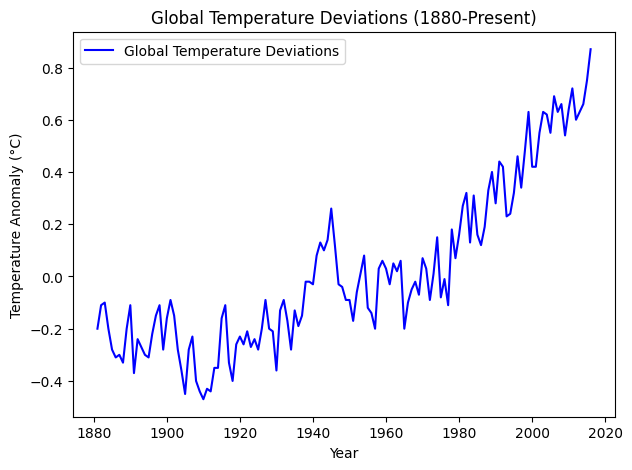

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from astsadata import globtemp

globtemp_series = pd.Series(globtemp.values.flatten(),
                  index=pd.date_range(start="1880",
                  periods=len(globtemp), freq="YE"))
plt.figure(figsize=(7,5))
plt.plot(globtemp_series, label="Global Temperature Deviations", color="blue")
plt.title("Global Temperature Deviations (1880-Present)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.show()

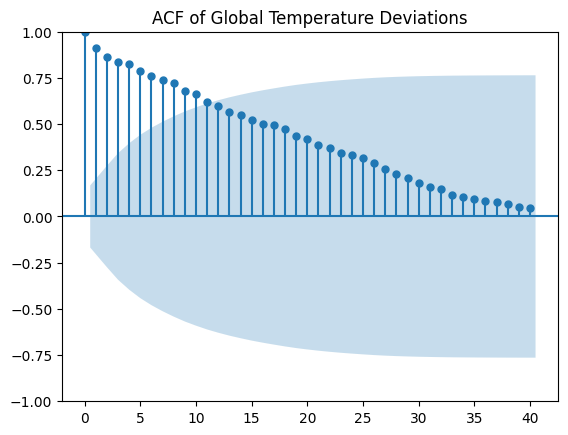

In [20]:
# ACF of original series
sm.graphics.tsa.plot_acf(globtemp_series, lags=40, title="ACF of Global Temperature Deviations")
plt.show()

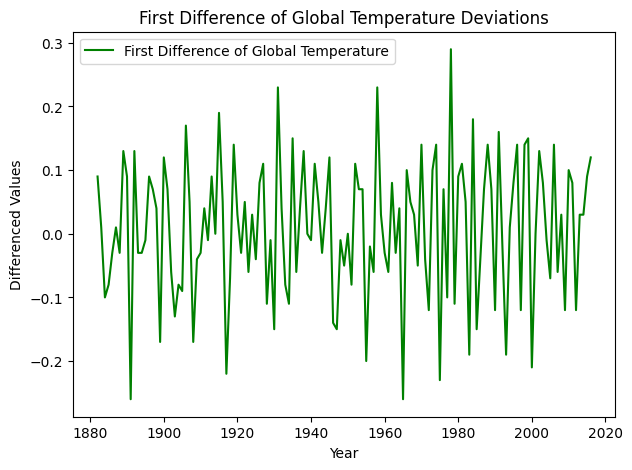

In [25]:
#first difference
diff_series = globtemp_series.diff().dropna()

# Plot the first differenced series
plt.figure(figsize=(7,5))
plt.plot(diff_series, label="First Difference of Global Temperature", color="green")
plt.title("First Difference of Global Temperature Deviations")
plt.xlabel("Year")
plt.ylabel("Differenced Values")
plt.legend()
plt.show()

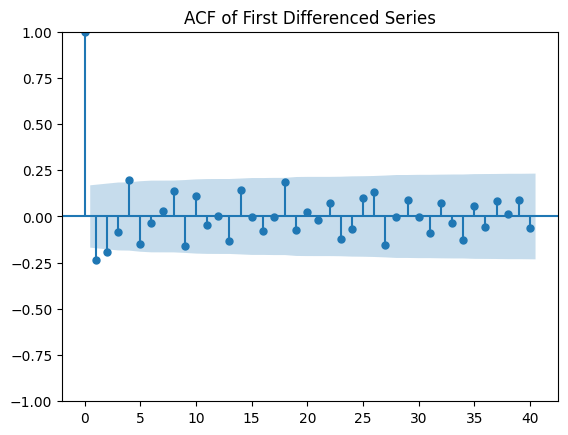

In [22]:
# ACF of first differenced series
sm.graphics.tsa.plot_acf(diff_series, lags=40, title="ACF of First Differenced Series")
plt.show()

In [23]:
#mean values series
mean_original = globtemp_series.mean()
mean_diff = diff_series.mean()
print(f"Mean of Original Series: {mean_original:.4f}")
print(f"Mean of First Differenced Series: {mean_diff:.4f}")

Mean of Original Series: 0.0184
Mean of First Differenced Series: 0.0079


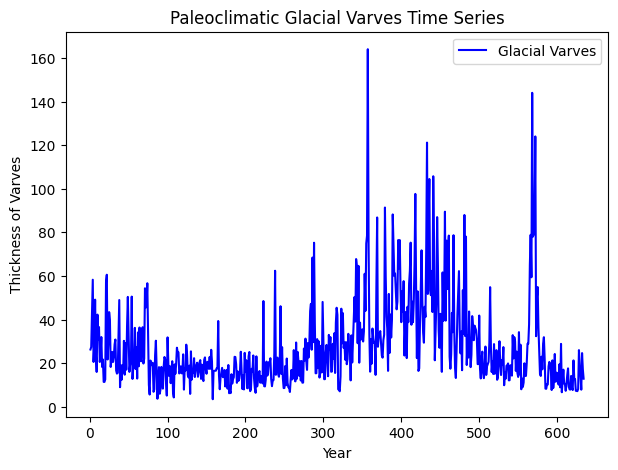

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from astsadata import varve

varves_series = pd.Series(varve.values.flatten(),
                      index=pd.RangeIndex(start=1,
                      stop=len(varve) + 1, step=1))

# Paleoclimatic Glacial Varves series
plt.figure(figsize=(7,5))
plt.plot(varves_series, label="Glacial Varves", color="blue")
plt.title("Paleoclimatic Glacial Varves Time Series")
plt.xlabel("Year")
plt.ylabel("Thickness of Varves")
plt.legend()
plt.show()

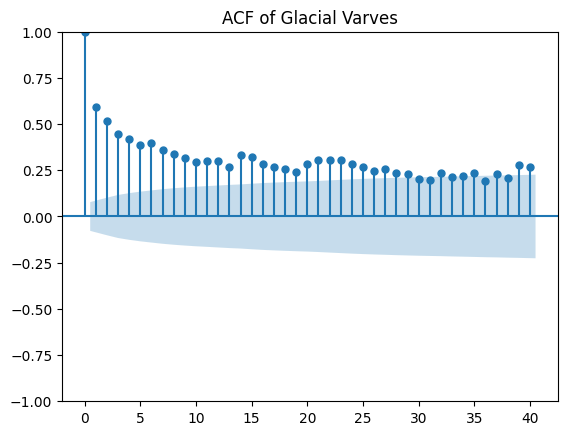

In [7]:
#ACF of the original series
sm.graphics.tsa.plot_acf(varves_series, lags=40, title="ACF of Glacial Varves")
plt.show()

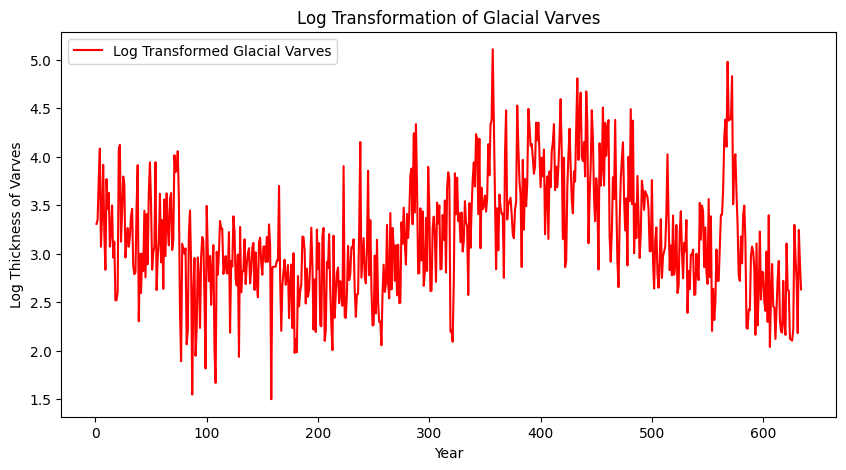

In [8]:
#log transformation
log_varves = np.log(varves_series + 1)

plt.figure(figsize=(10,5))
plt.plot(log_varves, label="Log Transformed Glacial Varves", color="red")
plt.title("Log Transformation of Glacial Varves")
plt.xlabel("Year")
plt.ylabel("Log Thickness of Varves")
plt.legend()
plt.show()

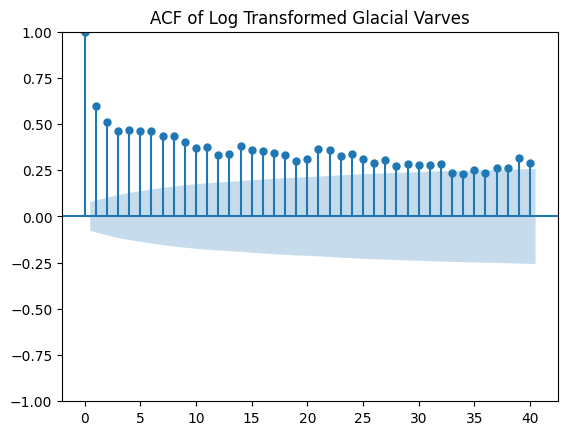

In [9]:
#ACF of log-transformed series
sm.graphics.tsa.plot_acf(log_varves, lags=40, title="ACF of Log Transformed Glacial Varves")
plt.show()

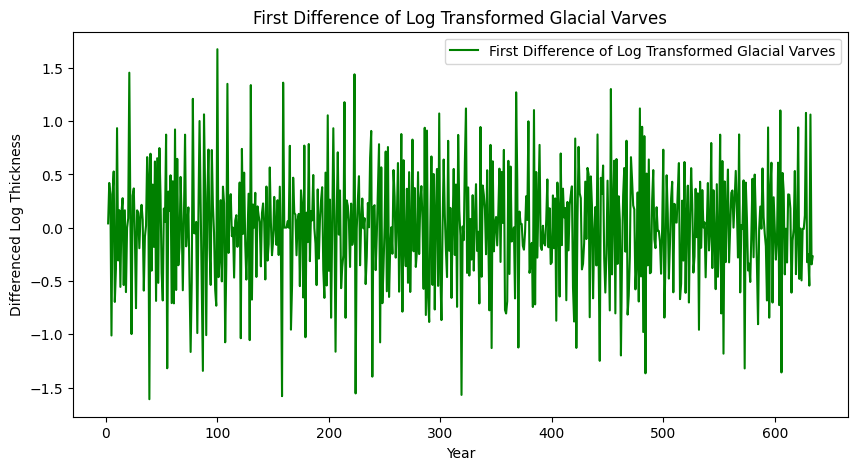

In [10]:
#first difference after log transformation
diff_log_varves = log_varves.diff().dropna()

plt.figure(figsize=(10,5))
plt.plot(diff_log_varves, label="First Difference of Log Transformed Glacial Varves", color="green")
plt.title("First Difference of Log Transformed Glacial Varves")
plt.xlabel("Year")
plt.ylabel("Differenced Log Thickness")
plt.legend()
plt.show()

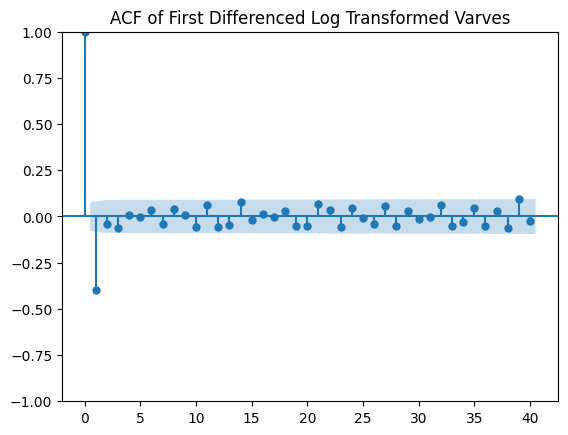

In [11]:
# ACF of first differenced after log-trans
sm.graphics.tsa.plot_acf(diff_log_varves, lags=40, title="ACF of First Differenced Log Transformed Varves")
plt.show()